# import a dataset

In [1]:
import pandas as pd        # import libries 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("housing_price_dataset.csv")  #import the data set

In [3]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


# Exploratory Data Analysis

In [4]:
df = df.drop(columns=['YearBuilt']) # remove the unnecessary columns

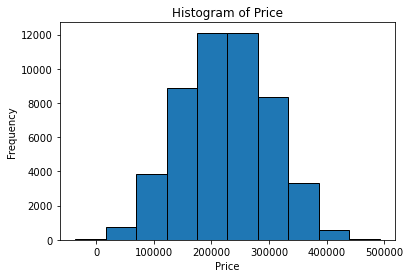

In [5]:
column_name = 'Price'
num_bins = 10 # Specify the number of bins for the histogram
plt.hist(df[column_name], bins=num_bins, edgecolor='black') # Create a histogram with specified bins
plt.xlabel(column_name) # Add labels and title
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')
plt.show() # Show the plot

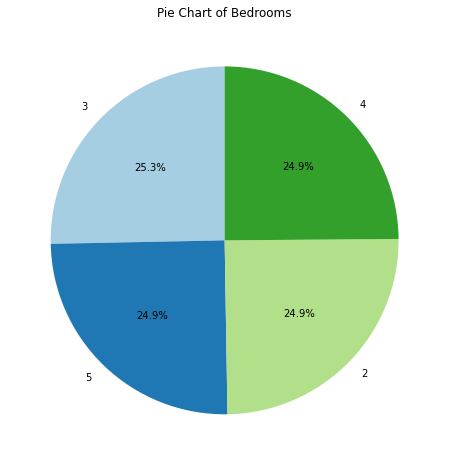

In [6]:
column_name = 'Bedrooms'
category_counts = df[column_name].value_counts() # Count the occurrences of each category in the column
plt.figure(figsize=(8, 8)) # Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title(f'Pie Chart of {column_name}') # Add a title
plt.show() # Show the plot

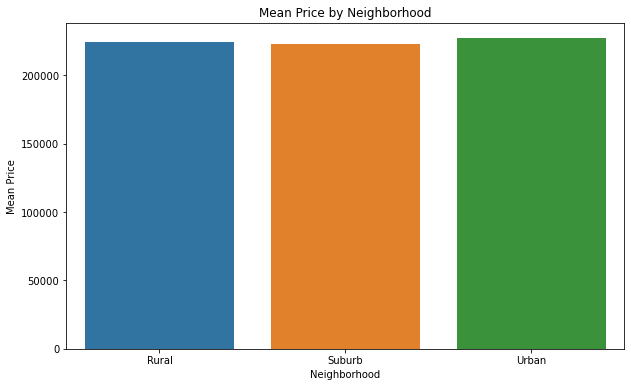

In [7]:


categorical_column = 'Neighborhood'
numerical_column = 'Price'

mean_prices = df.groupby(categorical_column)[numerical_column].mean().reset_index() # Calculate the mean for each neighborhood

plt.figure(figsize=(10, 6)) # Create a bar plot
sns.barplot(x=categorical_column, y=numerical_column, data=mean_prices)

plt.xlabel(categorical_column)
plt.ylabel(f'Mean {numerical_column}')
plt.title(f'Mean {numerical_column} by {categorical_column}')

plt.show()

# Data Preprocessing

In [9]:
print(df.isnull().sum())  # check missing values

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
Price           0
dtype: int64


In [10]:
df['SquareFeet'] = df['SquareFeet'].fillna(df['SquareFeet'].mean())  # fill numerical variables using mean
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [11]:
df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].mode()[0])  # fill categorical variable using mode
df['Neighborhood'] = df['Neighborhood'].fillna(df['Neighborhood'].mode()[0])
df['Neighborhood'] = df['Neighborhood'].fillna(df['Neighborhood'].mode()[0])

In [12]:

column_name = 'Price' # Specify the column containing numerical data with potential outliers

z_scores = stats.zscore(df[column_name]) # Calculate the Z-score for the specified column

threshold = 3   # Define a threshold for Z-score (e.g., 3 standard deviations)

outlier_indices = abs(z_scores) > threshold # Identify the indices of outliers

df = df[~outlier_indices] # Remove outliers from the DataFrame
print(df)

       SquareFeet  Bedrooms  Bathrooms Neighborhood          Price
0            2126         4          1        Rural  215355.283618
1            2459         3          2        Rural  195014.221626
2            1860         2          1       Suburb  306891.012076
3            2294         2          1        Urban  206786.787153
4            2130         5          2       Suburb  272436.239065
...           ...       ...        ...          ...            ...
49995        1282         5          3        Rural  100080.865895
49996        2854         2          2       Suburb  374507.656727
49997        2979         5          3       Suburb  384110.555590
49998        2596         5          2        Rural  380512.685957
49999        1572         5          3        Rural  221618.583218

[49965 rows x 5 columns]


In [13]:


column_name = 'SquareFeet' # Specify the column containing numerical data with potential outliers

z_scores = stats.zscore(df[column_name])# Calculate the Z-score for the specified column

threshold = 3 # Define a threshold for Z-score (e.g., 3 standard deviations)

outlier_indices = abs(z_scores) > threshold # Identify the indices of outliers

df = df[~outlier_indices] # Remove outliers from the DataFrame

print(df)

       SquareFeet  Bedrooms  Bathrooms Neighborhood          Price
0            2126         4          1        Rural  215355.283618
1            2459         3          2        Rural  195014.221626
2            1860         2          1       Suburb  306891.012076
3            2294         2          1        Urban  206786.787153
4            2130         5          2       Suburb  272436.239065
...           ...       ...        ...          ...            ...
49995        1282         5          3        Rural  100080.865895
49996        2854         2          2       Suburb  374507.656727
49997        2979         5          3       Suburb  384110.555590
49998        2596         5          2        Rural  380512.685957
49999        1572         5          3        Rural  221618.583218

[49965 rows x 5 columns]


In [14]:
label_encoder = LabelEncoder()

df['Bedrooms'] = label_encoder.fit_transform(df['Bedrooms'])  # categorical variable convert to label encoding
df['Bathrooms'] = label_encoder.fit_transform(df['Bathrooms'])
df['Neighborhood'] = label_encoder.fit_transform(df['Neighborhood'])


# Multiple Linear Regression

In [15]:

X = df.drop('Price', axis=1) # Drop the target variable to get the features
y = df['Price']  # Select the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets

In [16]:
model_1= LinearRegression()
model_1.fit(X_train, y_train) # Train the model
y_pred_1 = model_1.predict(X_test) # Make predictions on the test set

In [17]:
mse_1 = mean_squared_error(y_test, y_pred_1) # Calculate mse
r2_1 = r2_score(y_test, y_pred_1) # Calculate r**2
print(f'Mean Squared Error (MSE): {mse_1}')
print(f'R-squared (R2) Score: {r2_1}') 

Mean Squared Error (MSE): 2504079369.806855
R-squared (R2) Score: 0.5716611135317957


# Simple Linear Regression

In [18]:
X = df[['SquareFeet']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets



In [19]:
model_2= LinearRegression()# Create a linear regression model
model_2.fit(X_train, y_train)# Train the model
y_pred_2 = model_2.predict(X_test) # Make predictions on the test set


In [21]:
mse_2 = mean_squared_error(y_test, y_pred_2) # Calculate mse
r2_2 = r2_score(y_test, y_pred_2) # Calculate r**2
print(f'Mean Squared Error (MSE): {mse_2}')
print(f'R-squared (R2) Score: {r2_2}')

Mean Squared Error (MSE): 2544338490.233313
R-squared (R2) Score: 0.5647745319714882
